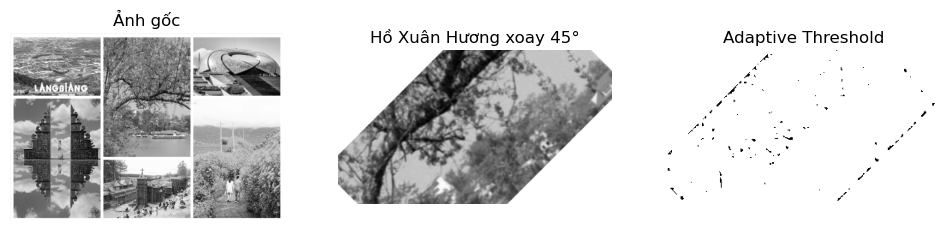

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh Đà Lạt từ thư mục exercise
img = cv2.imread('dalat.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Cắt vùng Hồ Xuân Hương (bạn cần điều chỉnh lại toạ độ cho đúng vùng hồ)
# Ví dụ: vùng giữa ảnh, bên dưới cây phượng tím
x, y, w, h = 600, 320, 320, 180
roi = img_gray[y:y+h, x:x+w]

# Xoay đối tượng vừa chọn 45 độ quanh tâm vùng chọn
center = (w//2, h//2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
roi_rotated = cv2.warpAffine(roi, M, (w, h), flags=cv2.INTER_LINEAR, borderValue=255)

# Áp dụng Adaptive Thresholding với ngưỡng 60
thresh = cv2.adaptiveThreshold(
    roi_rotated, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 60
)

# Lưu ảnh kết quả
cv2.imwrite('ho_xuan_huong.jpg', thresh)

# Hiển thị kết quả
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(roi_rotated, cmap='gray')
plt.title('Hồ Xuân Hương xoay 45°')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(thresh, cmap='gray')
plt.title('Adaptive Threshold')
plt.axis('off')
plt.show()